In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob
from scipy.interpolate import interp1d as i1

In [22]:
jww = ascii.read('2020jww-combined-20200523_ap1.flm', format = 'csv', delimiter = ' ',comment = '#', data_start = 0, names = ['wavelength', 'flux', 'fluxerr'])
jww

wavelength,flux,fluxerr
float64,float64,float64
3253.527234291074,0.3010898434591836,0.21419289994723256
3256.054468582148,-0.034212029418438594,0.17595091747292022
3258.5817028732217,-0.014169915778544881,0.13636616133314136
3261.1089371642956,0.11721217293455177,0.13329280689859974
3263.6361714553695,0.24603037627047936,0.13123779104053165
3266.1634057464435,0.07040806463342095,0.1424622615559665
3268.6906400375174,0.24531618800067917,0.11906790069025379
3271.2178743285913,0.16565697635131507,0.11928917147251641
3273.745108619665,0.00391435930564446,0.10744352683145408


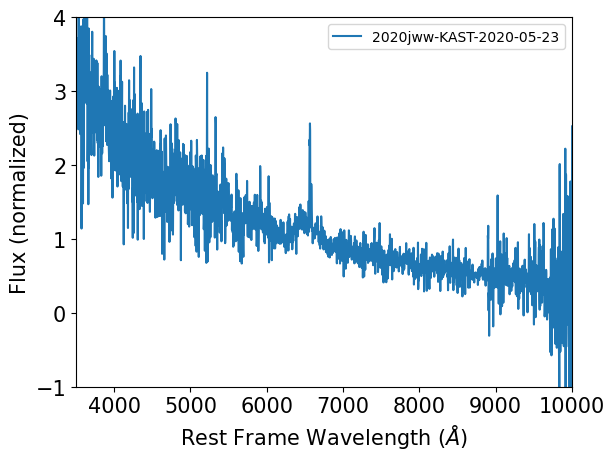

In [23]:
jww_z = 0.046
jww_wavelength = jww['wavelength']
jww_flux = jww['flux']
jww_err = jww['fluxerr']

plt.figure()
plt.plot(jww_wavelength / ( 1 + jww_z), jww_flux / np.median(jww_flux), label = '2020jww-KAST-2020-05-23')
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3500, 10000)
plt.ylim(-1, 4)
plt.legend()

In [29]:
hgw_ALFOSC = ascii.read('SN2020hgw_NOT_gr4_spec_28042020.txt', format = 'csv', delimiter = ' ', names = ['wavlength', 'flux'])

In [25]:
hgw = ascii.read('2020hgw-combined-20200523_ap1.flm', format = 'csv', delimiter = ' ', comment = '#', data_start = 0, names = ['wavelength', 'flux', 'fluxerr'])
hgw

wavelength,flux,fluxerr
float64,float64,float64
3253.527137842927,0.1432388120536085,0.2163710710962882
3256.054275685854,0.5402248764362954,0.19277997595635357
3258.581413528781,0.338484752420793,0.1466045879672302
3261.108551371708,0.4892929826775469,0.13683669604570867
3263.635689214635,0.4343540386281955,0.14124734488027982
3266.162827057562,0.4305409300110732,0.14402902658738256
3268.689964900489,0.12144710779768854,0.12744870246756101
3271.217102743416,0.16671959276056034,0.12794713615426406
3273.744240586343,0.17211954263625462,0.11574732302396845


     flux    
-------------
  2.28882e-16
 8.611588e-16
 8.503812e-16
 1.029166e-15
 2.812461e-16
 1.862939e-16
 4.583609e-16
  5.75527e-16
 3.720349e-16
 4.672601e-16
          ...
-8.767946e-18
-1.115337e-17
 3.499927e-17
  5.70816e-17
 4.841525e-17
 3.051036e-17
 2.580743e-17
 3.584278e-17
 3.728038e-17
 2.298107e-17
 5.641037e-17
Length = 1537 rows


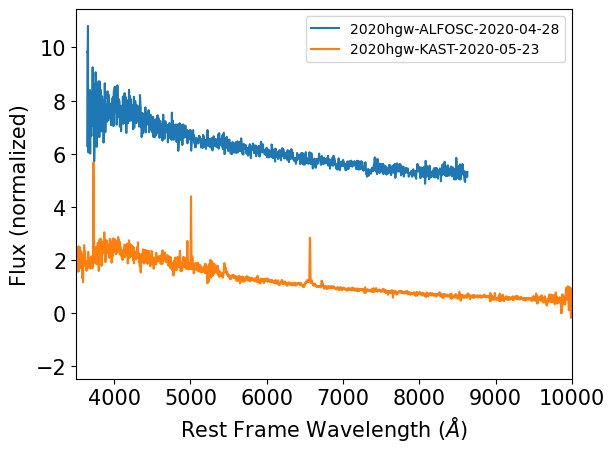

In [34]:
hgw_z = 0.043
hgw_wavelength = hgw['wavelength']
hgw_flux = hgw['flux']
hgw_err = hgw['fluxerr']

alfosc_wl = hgw_ALFOSC['wavlength']
alfosc_flux = hgw_ALFOSC['flux']

print(alfosc_flux)

plt.figure()
plt.plot(alfosc_wl / (1 + hgw_z), alfosc_flux / np.median(alfosc_flux) + 5, label = '2020hgw-ALFOSC-2020-04-28')
plt.plot(hgw_wavelength / ( 1 + hgw_z), hgw_flux / np.median(hgw_flux), label = '2020hgw-KAST-2020-05-23')
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3500, 10000)
# plt.ylim(-1, 4)
plt.legend()